<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0315/raw/main/bg%20morning.png"
urlretrieve(url, "test.png")

('test.png', <http.client.HTTPMessage at 0x7f9aec41b7f0>)

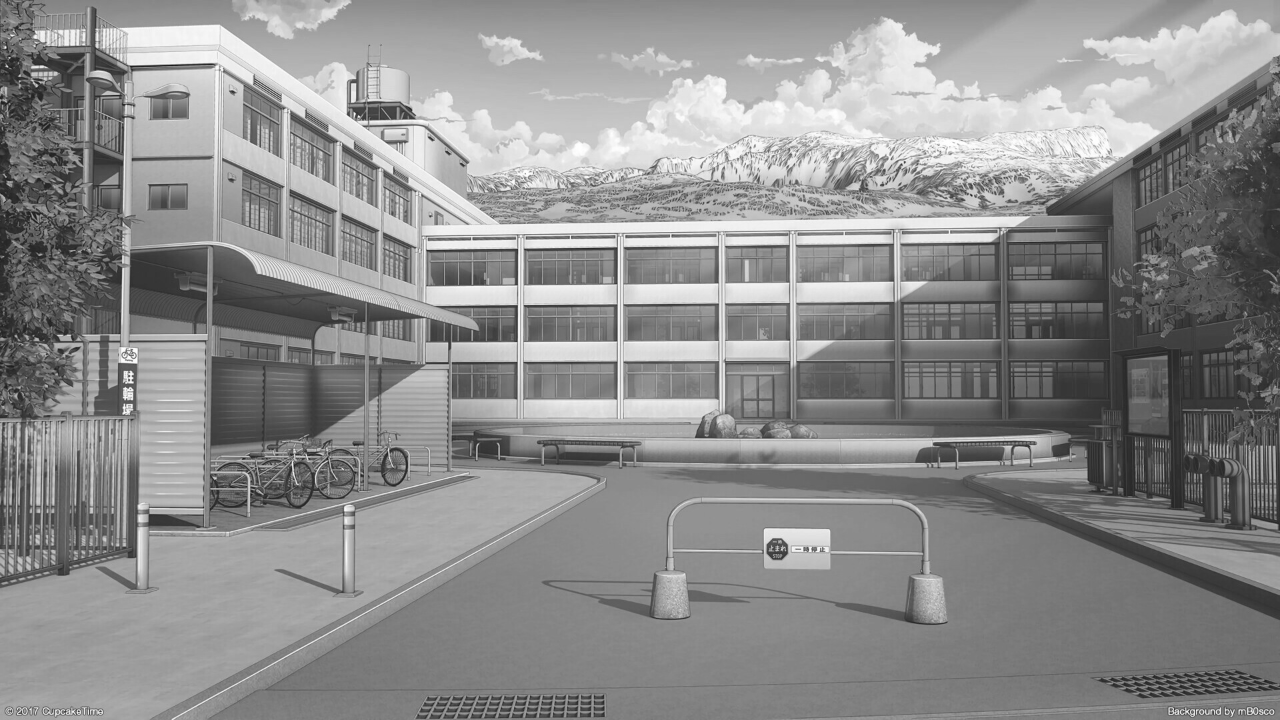

In [ ]:
import numpy as np
from PIL import Image
img = Image.open("test.png").convert("L")
img_np = np.array(img)
img

In [ ]:
img_np.shape

(720, 1280)

In [ ]:
# Gx
Gx = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

def combine(img, ci, cj, g):
    # ci, cj: center -1: top left
    si, sj = ci-1, cj-1
    total = 0.0
    for i in range(3):
        for j in range(3):
            total = total + img[si+i][sj+j] * g[i][j]
    return abs(total)


img_gx = np.zeros(img_np.shape)
h, w = img_np.shape
for i in range(1, h-1):
    for j in range(1, w-1):
        img_gx[i][j] = combine(img_np, i, j, Gx)

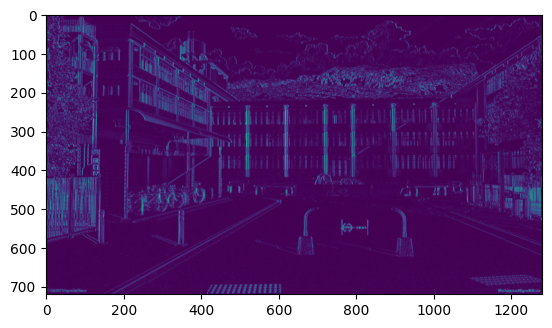

In [ ]:
import matplotlib.pyplot as plt

# 0~255(ok) 0.0~1.0(ok)
# 0~1: (pi - min) / (max - min)
ma = img_gx.max()
mi = img_gx.min()
img_norm = (img_gx - mi) / (ma - mi)
plt.imshow(img_norm)

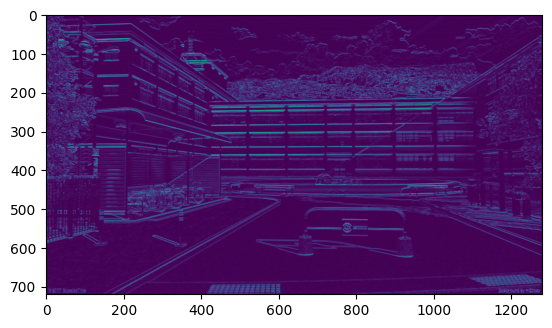

In [ ]:
# Gy
Gy = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]


img_gy = np.zeros(img_np.shape)
h, w = img_np.shape
for i in range(1, h-1):
    for j in range(1, w-1):
        img_gy[i][j] = combine(img_np, i, j, Gy)

ma = img_gy.max()
mi = img_gy.min()
img_norm = (img_gy - mi) / (ma - mi)
plt.imshow(img_norm)

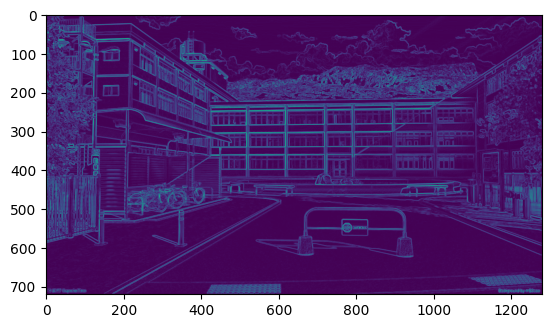

In [ ]:
img_g = (img_gx ** 2 + img_gy ** 2) ** 0.5
ma = img_g.max()
mi = img_g.min()
img_norm = (img_g - mi) / (ma - mi)
plt.imshow(img_norm)

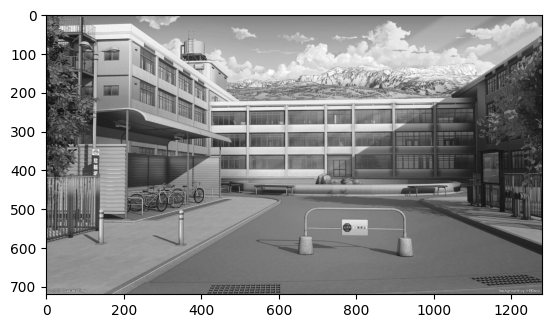

In [ ]:
# np array的操作: 對於每一個軸都進行一個list操作
img = Image.open("test.png").convert("RGB")
img_np = np.array(img)
# 左右相反: plt.imshow(img_np[:, ::-1, :])
# 上下相反: plt.imshow(img_np[::-1, :, :])
# 200, 400: plt.imshow(img_np[:200, :400, :])
r, g, b = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]
gray = r * 0.299 + g * 0.587 + b * 0.114
plt.imshow(gray, cmap="gray")

In [ ]:
# Gx
Avg = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]

def combine(img, ci, cj, g):
    # ci, cj: center -1: top left
    si, sj = ci-1, cj-1
    total = 0.0
    for i in range(3):
        for j in range(3):
            total = total + img[si+i][sj+j] * g[i][j]
    return abs(total)

avg = np.zeros(img_np.shape)
h, w = img_np.shape
for i in range(1, h-1):
    for j in range(1, w-1):
        avg[i][j] = combine(img_np, i, j, Avg)


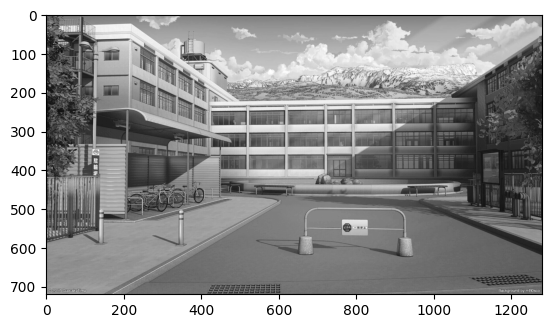

In [ ]:
plt.imshow(img_np, cmap="gray")
Image.frombytes("L", img_np.shape[::-1], img_np).save("original.png")

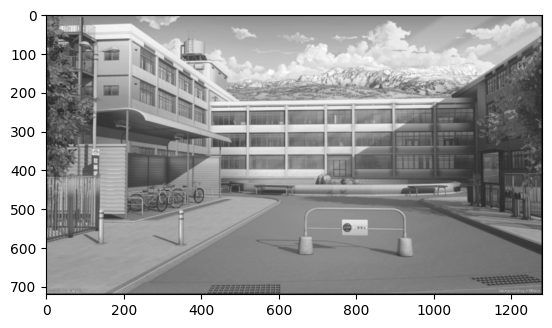

In [ ]:
import matplotlib.pyplot as plt

ma = avg.max()
mi = avg.min()
img_norm = (avg - mi) / (ma - mi)
plt.imshow(img_norm, cmap="gray")

In [36]:
img_norm_int = (img_norm * 255).astype("uint8")

In [35]:
Image.frombytes("L", img_np.shape[::-1], img_norm_int).save("avg.png")